# LAB WORK NO.1 - Homographies for Computer Vision

## Table of contents


1. [Required libraries](#Required-libraries)

2. [Load the images](#Load-the-images)

2. [Task 1](#Task-1)

3. [Task 2](#Task-2)

4. [Task 3](#Task-3)

5. [Task 4](#Task-4)

## Required libraries
[[go back to the top] ](#Table-of-contents)

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


## Load the images
[[go back to the top] ](#Table-of-contents)

In [3]:
# Define img dir in a var
image_dir = "images/"

## Task 1
[[go back to the top] ](#Table-of-contents)

In [66]:
# Load object and scene images 
# Comment out the examples you don't want to run

# example 1: wally and wally_scene
# object_img = cv2.imread(os.path.join(image_dir, 'wally.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'find_wally.jpeg'))
# example 2: box and box_scene
# object_img = cv2.imread(os.path.join(image_dir, 'match_box01a_1.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'match_box01a_2.png'))
# example 3: elephant and scene
object_img = cv2.imread(os.path.join(image_dir, 'match_scene01_2.png'))
scene_img = cv2.imread(os.path.join(image_dir, 'match_scene01_3.png'))
# example 4: box2 and scene
# object_img = cv2.imread(os.path.join(image_dir, 'match_scene01_1.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'match_scene01_3.png'))


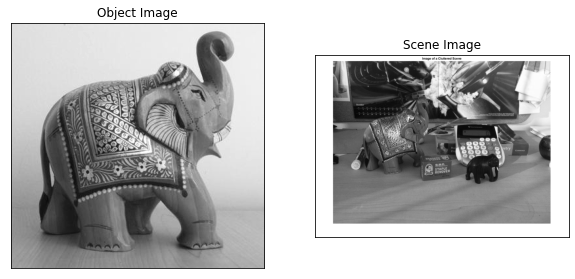

In [67]:
# Convert images to grayscale
object_gray = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)
scene_gray = cv2.cvtColor(scene_img, cv2.COLOR_BGR2GRAY)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(object_gray, cmap = 'gray')
plt.title('Object Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(scene_gray, cmap = 'gray')
plt.title('Scene Image'), plt.xticks([]), plt.yticks([])
plt.show()


### Key Points and Descriptors detection

Run one of the following cells to detect the keypoints and descriptors of the images.  
- SIFT
- ORB
- AKAZE
- BRISK
- KAZE

#### SIFT

In [68]:
# Feature detector
# SIFT-0 (Scale Invariant Feature Transform)
# ORB-1 (Oriented FAST and Rotated BRIEF)
# BRISK-2 (Binary Robust Invariant Scalable Keypoints)
# KAZE-3 (Accelerated-SIFT)
# AKAZE-4 (Accelerated-KAZE)
option = 0
match option:
    case 0:
        fd =cv2.SIFT_create()
    case 1:
        fd =cv2.ORB_create()
    case 2:
        fd =cv2.BRISK_create()
    case 3:
        fd =cv2.KAZE_create()
    case 4:
        fd =cv2.AKAZE_create()      
    case _:
        fd =cv2.SIFT_create()

# Find the keypoints and descriptors

kp1, des1 = fd.detectAndCompute(object_gray,None)
kp2, des2 = fd.detectAndCompute(scene_gray,None)    

### Matching

In [69]:
# TODO TRY ANOTHER MATCHER
# Match descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)


### Outliers removal

##### Lowe Ratio Test

In [70]:
# TODO: test different ratio values
# Apply ratio test
good = []
for match_pair in matches:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < 0.75 * n.distance:
            good.append(m)
    

##### RANSAC

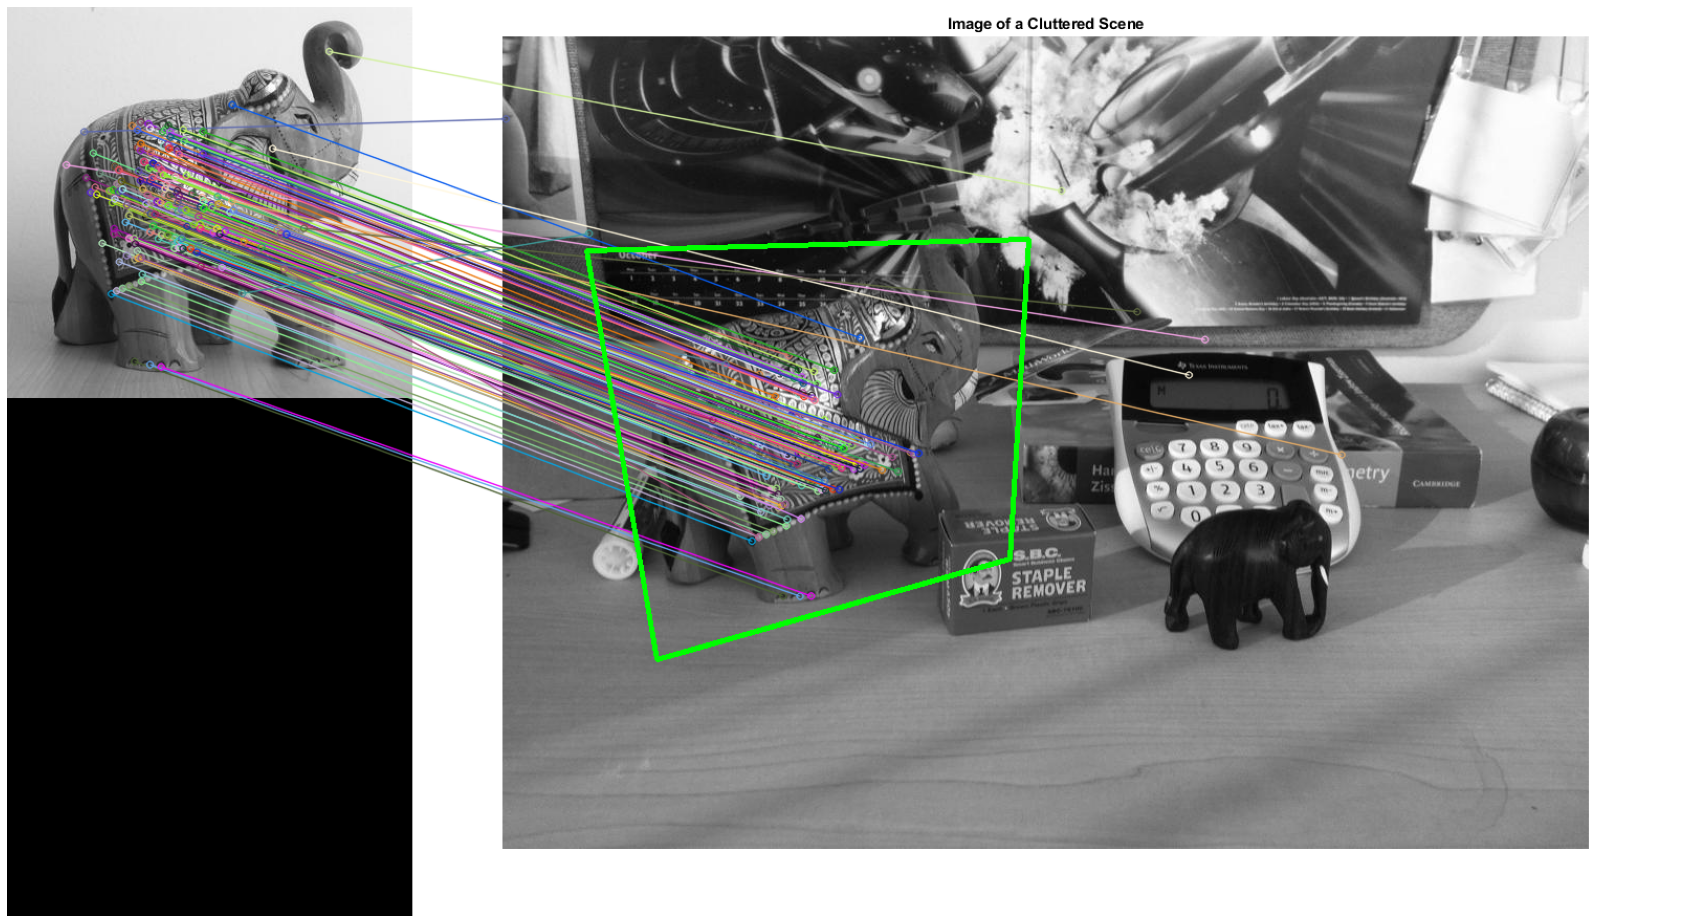

In [71]:
# TODO: test different parameters; influence of using the RANSAC method or not

# Draw matches
img_matches = cv2.drawMatches(object_img, kp1, scene_img, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# Find the object in the scene
object_corners = np.float32([[0, 0], [object_img.shape[1], 0], [object_img.shape[1], object_img.shape[0]], [0, object_img.shape[0]]])
scene_corners, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
scene_corners = cv2.perspectiveTransform(object_corners.reshape(-1, 1, 2), scene_corners).reshape(-1, 2)

# Draw lines around the object in the scene
for i in range(4):
    pt1 = (int(scene_corners[i][0] + object_img.shape[1]), int(scene_corners[i][1]))
    pt2 = (int(scene_corners[(i+1)%4][0] + object_img.shape[1]), int(scene_corners[(i+1)%4][1]))
    cv2.line(img_matches, pt1, pt2, (0, 255, 0), 4)


# Show detected matches
plt.figure(figsize=(30,30))
plt.axis('off')
plt.imshow(img_matches, cmap = 'gray')
#plt.savefig('results/task1/wally.png')
plt.show()


## Task 2
[[go back to the top] ](#Table-of-contents)

## Task 3
[[go back to the top] ](#Table-of-contents)

## Task 4
[[go back to the top] ](#Table-of-contents)

In [72]:
# Load the image
img = cv2.imread(os.path.join(image_dir, 'lane1.jpg'))

# Define the mouse callback function
def mouse_callback(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("here")
        print(points)
        # If less than 4 points have been selected, record the coordinates of the clicked point
        if len(points) < 4:
            points.append((x, y))
            print(f"Point selected: ({x}, {y})")
# Create a window to display the image
cv2.namedWindow('Image')

# Initialize the list of points
points = []

# Set the mouse callback function
cv2.setMouseCallback('Image', mouse_callback)

# Display the image and wait for user input
while True:
    cv2.imshow('Image', img)
    key = cv2.waitKey(1)

    # If the 'c' key is pressed, clear the selected points
    if key == ord('c'):
        points = []

    # If the 's' key is pressed or 4 points have been selected, stop the loop
    elif len(points) == 4:
        break

# Convert the list of points to a NumPy array
src = np.float32(points)

# Print the selected points
print("Selected points:")
print(points)

# Close the window
cv2.destroyAllWindows()



# define source points
#src = np.float32([[0, 409], [290, 250], [460, 250], [700, 409]])

# define destination points
lane_width_px = 430
#dst = np.float32([[img.shape[1]/3, img.shape[0]], [img.shape[1]/3, 0], [img.shape[1] - img.shape[1]/3, 0], [img.shape[1] - img.shape[1]/3, img.shape[0]]])
dst = np.float32([[lane_width_px,  img.shape[0]], [ img.shape[0], 0], [img.shape[1] -lane_width_px, 0], [img.shape[1]-lane_width_px, img.shape[0]]])
# compute perspective transformation matrix
M = cv2.getPerspectiveTransform(src, dst)

# apply perspective transformation
warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)

print(img.shape)

# Display the IPM image
cv2.imshow('IPM', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()



here
[]
Point selected: (4, 523)
here
[(4, 523)]
Point selected: (446, 326)
here
[(4, 523), (446, 326)]
Point selected: (559, 323)
here
[(4, 523), (446, 326), (559, 323)]
Point selected: (947, 530)
Selected points:
[(4, 523), (446, 326), (559, 323), (947, 530)]
(538, 960, 3)


In [73]:
# Load the image
img = cv2.imread(os.path.join(image_dir, 'lane2.jpg'))

# Define source points
src = np.float32([[0, 409], [290, 250], [460, 250], [700, 409]])

# Calculate the width of the lane your car is in
lane_width = 200  # change this value to match the width of the lane

# Define destination points
dst = np.float32([[img.shape[1]/2 - lane_width/2, img.shape[0]], 
                  [img.shape[1]/2 - lane_width/2, 0], 
                  [img.shape[1]/2 + lane_width/2, 0], 
                  [img.shape[1]/2 + lane_width/2, img.shape[0]]])

# Compute perspective transformation matrix
M = cv2.getPerspectiveTransform(src, dst)

# Apply perspective transformation
warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)

# Display the IPM image
cv2.imshow('IPM', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()




### Load the images

In [4]:
# 4 images of road lanes
img = cv2.imread(os.path.join(image_dir, 'lane1.jpg'))
img2 = cv2.imread(os.path.join(image_dir, 'lane2.jpg'))
img3 = cv2.imread(os.path.join(image_dir, 'lane3.jpg'))
img4 = cv2.imread(os.path.join(image_dir, 'lane4.png'))

images = [img, img2, img3, img4]

In [5]:
def display_imgs(img,img2,img3,img4, cmap=None):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    axs[0, 0].imshow(img, cmap=cmap)
    axs[0, 0].set_title('Image 1')
    axs[0, 1].imshow(img2, cmap=cmap)
    axs[0, 1].set_title('Image 2')
    axs[1, 0].imshow(img3, cmap=cmap)
    axs[1, 0].set_title('Image 3')
    axs[1, 1].imshow(img4, cmap=cmap)
    axs[1, 1].set_title('Image 4')

plt.show()

### Apply threshold

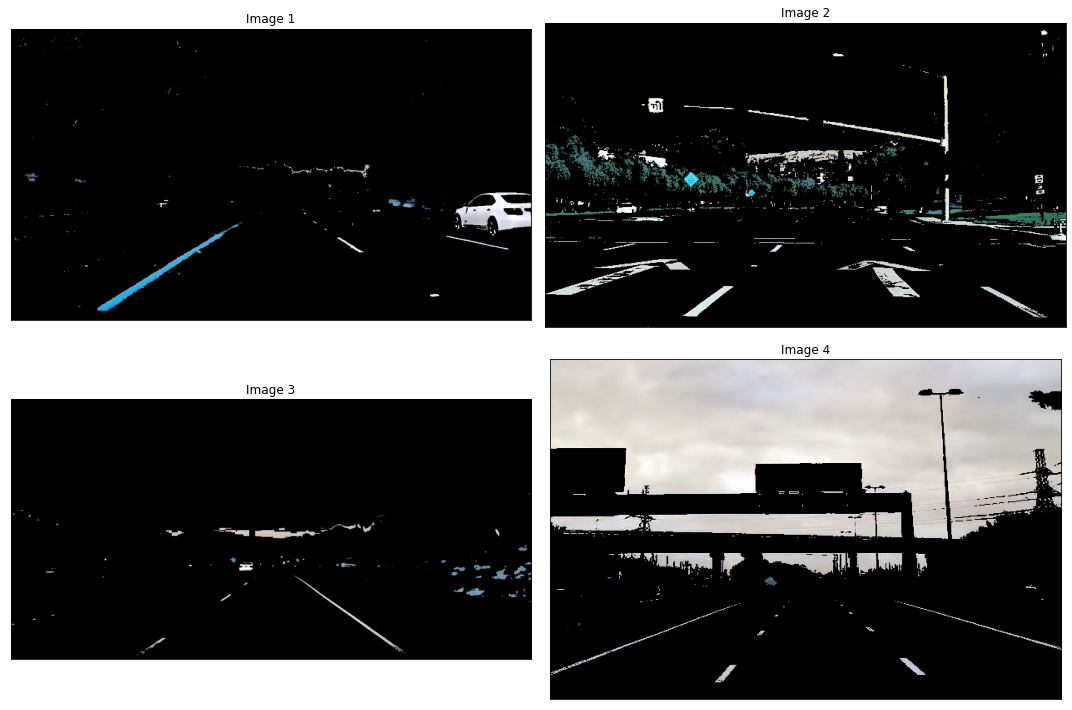

In [6]:
# For HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255]
threshold_imgs = []

# define range of 'whites' to be detected
lower_white = np.array([0, 0, 191]) # ~ [0,0,75]
upper_white = np.array([179, 30, 255]) # ~ [360,10,100]


# define range of 'yellows' to be detected
lower_yellow = np.array([15, 80, 100]) # ~ [30,31,40]
upper_yellow = np.array([45, 255, 255]) # ~ [90,100,100]

for x in images:

    # Convert BGR to HSV
    hsv = cv2.cvtColor(x, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only white colors
    mask_white = cv2.inRange(hsv, lower_white, upper_white)

    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Combine the mask
    mask = cv2.bitwise_or(mask_white, mask_yellow)

    # Apply the mask
    res = cv2.bitwise_and(x, x, mask=mask)

    threshold_imgs.append(res)

display_imgs(threshold_imgs[0], threshold_imgs[1], threshold_imgs[2], threshold_imgs[3])

### Edge detection using Canny

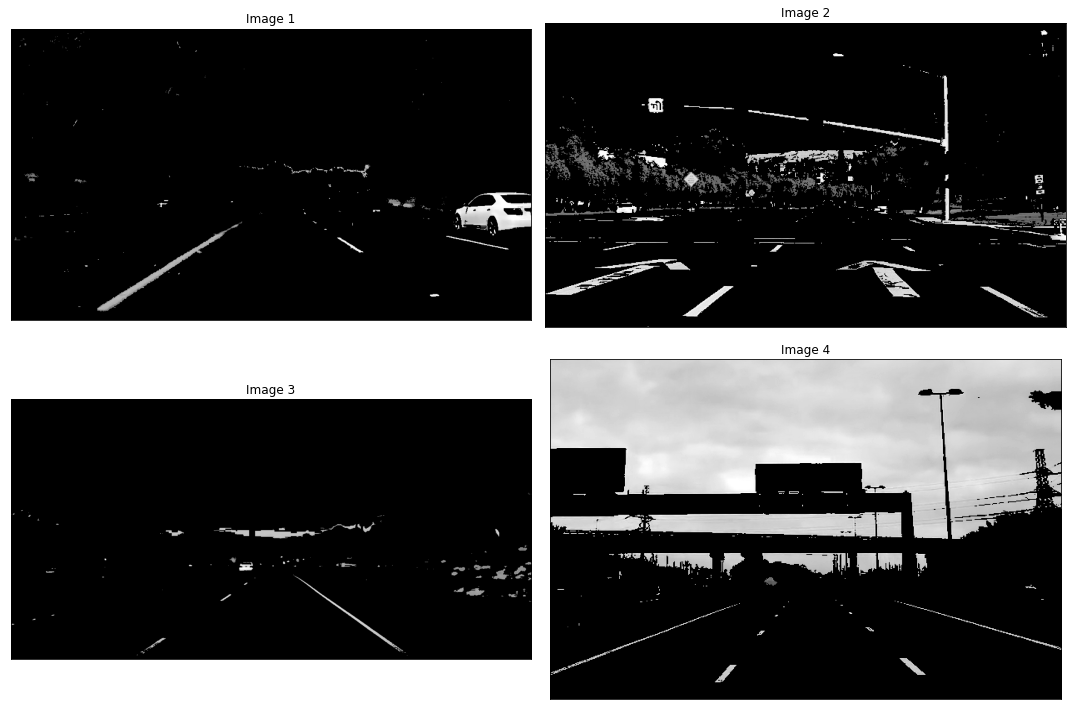

In [7]:
canny_imgs = []
for x in threshold_imgs:

    # Convert to grayscale
    gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (15, 15), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 50, 150)
    
    canny_imgs.append(gray)

display_imgs(canny_imgs[0], canny_imgs[1], canny_imgs[2], canny_imgs[3], cmap='gray')


### Region of interest

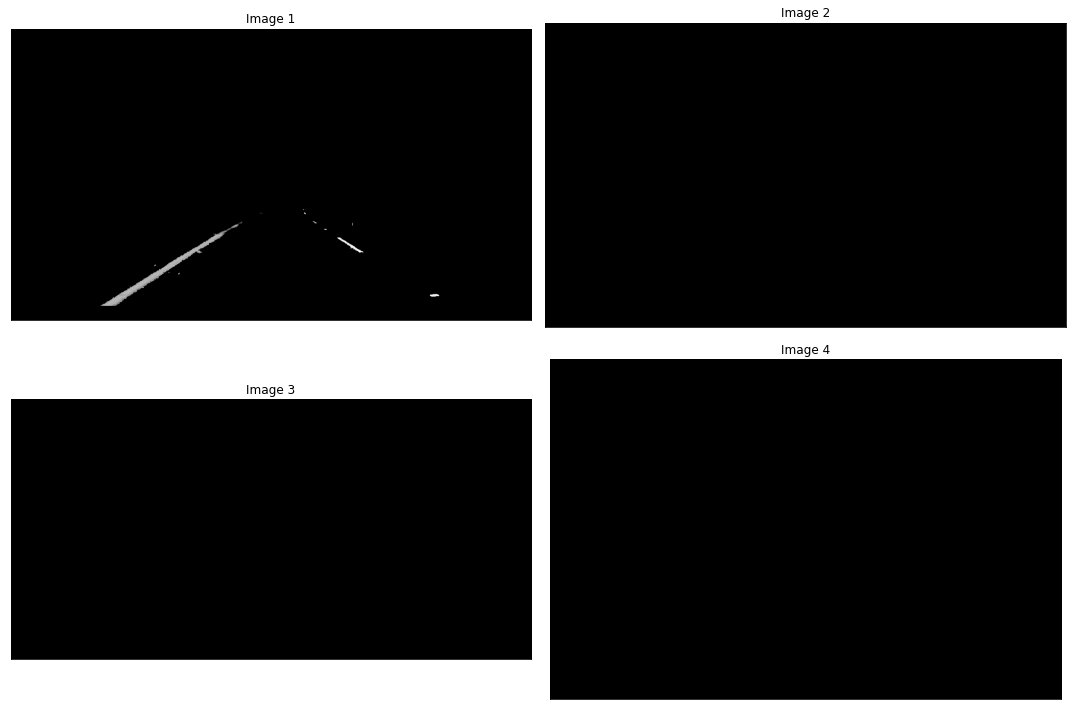

In [14]:
# define the polygon by vertices
img1_roi = np.array([[(96, 511), (384, 322), (576, 322), (864, 511)]], dtype=np.int32)
img2_roi = np.array([[(41, 700), (164, 420), (369, 700), (245, 420)]], dtype=np.int32)
img3_roi = np.array([[(70, 1330), (279, 840), (628, 1330), (419, 840)]], dtype=np.int32)
img4_roi = np.array([[(41, 584), (164, 369), (368, 584), (245, 369)]], dtype=np.int32)

# create a mask using the polygon
mask1 = np.zeros_like(canny_imgs[0])
mask2 = np.zeros_like(canny_imgs[1])
mask3 = np.zeros_like(canny_imgs[2])
mask4 = np.zeros_like(canny_imgs[3])

cv2.fillPoly(mask1, img1_roi, 255)
cv2.fillPoly(mask2, img2_roi, 255)
cv2.fillPoly(mask3, img3_roi, 255)
cv2.fillPoly(mask4, img4_roi, 255)

# apply the mask to the canny edge detected image
masked_image1 = cv2.bitwise_and(canny_imgs[0], mask1)
masked_image2 = cv2.bitwise_and(canny_imgs[1], mask2)
masked_image3 = cv2.bitwise_and(canny_imgs[2], mask3)
masked_image4 = cv2.bitwise_and(canny_imgs[3], mask4)

# display the images with the mask on them
display_imgs(masked_image1, masked_image2,
             masked_image3, masked_image4, cmap='gray')


[[[ 96 511]
  [384 322]
  [576 322]
  [864 511]]]
[[[ 70 388]
  [280 245]
  [420 245]
  [630 388]]]
[[[ 140  663]
  [ 560  418]
  [ 840  418]
  [1260  663]]]
[[[ 61 388]
  [246 245]
  [369 245]
  [553 388]]]


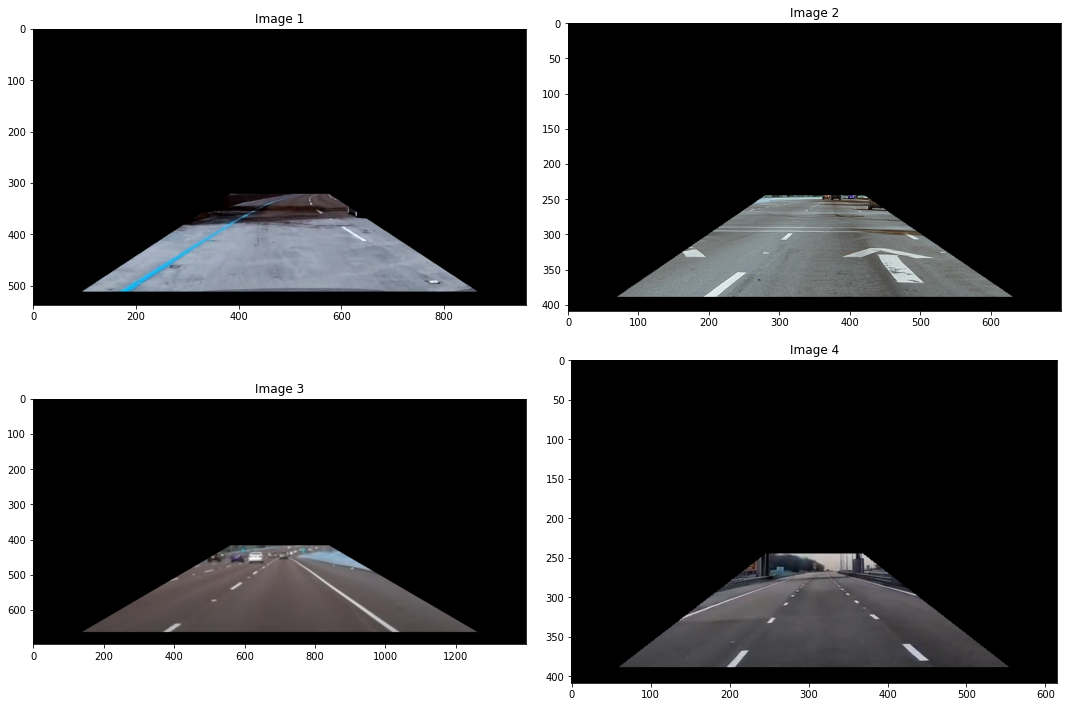

In [11]:

def region_selection(image):
    """
    Determine and cut the region of interest in the input image.
        Parameters:
            image: An np.array compatible with plt.imshow.
    """
    mask = np.zeros_like(image)   
    #Defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #We could have used fixed numbers as the vertices of the polygon,
    #but they will not be applicable to images with different dimesnions.
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0.1, rows * 0.95]
    top_left     = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    print(vertices)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image


img = region_selection(img)
img2 = region_selection(img2)
img3 = region_selection(img3)
img4 = region_selection(img4)

#plot images using matplotlib
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout()
axs[0, 0].imshow(img)
axs[0, 0].set_title('Image 1')
axs[0, 1].imshow(img2)
axs[0, 1].set_title('Image 2')
axs[1, 0].imshow(img3)
axs[1, 0].set_title('Image 3')
axs[1, 1].imshow(img4)
axs[1, 1].set_title('Image 4')

plt.show()

